In [2]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import requests
import urllib
import re
import nltk

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('../tweets.csv')

df.head()

,username,date,tweet,mentions
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein']
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein']
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein']
3,sanjan_suman,10-06-2020,@VodafoneIN I have done my recharge of 555 on...,['vodafonein']
4,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein']


In [4]:
# Explore the data
print('Dataset Columns:', df.columns)
print('Dataset Shape:', df.shape)

Dataset Columns: Index(['username', 'date', 'tweet', 'mentions'], dtype='object')
Dataset Shape: (21047, 4)


In [5]:
# Checking the tweet at index 444 for inspection
df['tweet'][444]

'Can you share me good plan and can tell me how can i port my network operator'

In [6]:
# Filter rows with only ASCII characters in the 'tweet' column
df= df[df['tweet'].apply(lambda x: x.isascii())]
# Verify the changes
df['tweet'].head()

0    Please check what happens to this no 940417705...
1    Network fluctuations and 4G Speed is pathetic....
2    This has been going on since 3rd... this absol...
4    But when???Still I am not received any call fr...
5    @VodafoneIN mere area me vodafone ka network n...
Name: tweet, dtype: object

In [7]:
# Define a pattern to remove @ mentions
def remove_pattern(input_txt, pattern):

  # Find all occurences of the pattern in the input text
  r= re.findall(pattern, input_txt)

  # Replace each occurence with an empty string (remove it)
  for i in r:
    input_txt= re.sub(i, '', input_txt)

  return input_txt

# Apply the remove_pattern function
df['clean_text']= np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

# Verify the changes
df['clean_text'].head(150)

0      Please check what happens to this no 940417705...
1      Network fluctuations and 4G Speed is pathetic....
2      This has been going on since 3rd... this absol...
4      But when???Still I am not received any call fr...
5       mere area me vodafone ka network nai aa raha ...
7       \nHi,\n Today my Vodafone cim is deactivated ...
8      Dear Vodafone, I have already responded to you...
9       SIR OUR MARKET AREA ME BILKUL NETWORK NAHI AA...
11     Vodafone Netwrk is worst ever...Using from so ...
12      9796053999... internet not working, pls assis...
13                      Still waiting for your reply    
15      Unable to access your website and is showing ...
16     Worst customer care, I charged 1072 for intern...
18      call drops are very high.\nThis is 4th day m ...
19     Please help with the exact process of changing...
20                                                      
21             I haven't received any message Or update.
22                             

In [8]:
# Convert the text to lowercase for consistency
df['clean_text']= df['clean_text'].str.lower()

# df['clean_text']= df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

# Check the new cleaned dataset
df['clean_text'].head(150)

0      please check what happens to this no 940417705...
1      network fluctuations and 4g speed is pathetic....
2      this has been going on since 3rd... this absol...
4      but when???still i am not received any call fr...
5       mere area me vodafone ka network nai aa raha ...
7       \nhi,\n today my vodafone cim is deactivated ...
8      dear vodafone, i have already responded to you...
9       sir our market area me bilkul network nahi aa...
11     vodafone netwrk is worst ever...using from so ...
12      9796053999... internet not working, pls assis...
13                      still waiting for your reply    
15      unable to access your website and is showing ...
16     worst customer care, i charged 1072 for intern...
18      call drops are very high.\nthis is 4th day m ...
19     please help with the exact process of changing...
20                                                      
21             i haven't received any message or update.
22                             

Tokenization is an essential step in preparing text for natural language processing tasks. It involves breaking down sentences into individual words or tokens, which makes it easier to analyze the structure and meaning of the text.

Once the text is tokenized, the tokens are often joined back together to maintain a consistent format in the DataFrame. This prepares the data for later steps like vectorization and clustering. Tokenization helps reveal patterns, word relationships, and can lead to better performance in NLP models.


In [9]:
# # Tokenize the 'clean_text' column
# df['tokenized_text']= df['clean_text'].apply(lambda x: x.split())

# # Rejoin the tokens back into sentences
# df['clean_text']= df['tokenized_text'].apply(' '.join)

# # Remove the temporary 'tokenized_text'
# df= df.drop('tokenized_text', axis= 1)

# # Verify changes
# df['clean_text'].head(10)

In [10]:
# Drop duplicate rows based on 'clean_text' and reset the index
df.drop_duplicates(subset= ['clean_text'], keep= 'first', inplace= True)
df.reset_index(drop= True, inplace= True)

# Add a column that contains the lenght of the 'clean_text'
df['clean_text_length']= df['clean_text'].apply(len)

# Check the first few rows to confirm changes
df.head()

,username,date,tweet,mentions,clean_text,clean_text_length
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein'],please check what happens to this no 940417705...,90
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein'],network fluctuations and 4g speed is pathetic....,95
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein'],this has been going on since 3rd... this absol...,67
3,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein'],but when???still i am not received any call fr...,82
4,tanzeelu3,10-06-2020,@VodafoneIN mere area me vodafone ka network n...,['vodafonein'],mere area me vodafone ka network nai aa raha ...,100


In [11]:
# Filter tweets from the user omanmessi for inspection
df[df['username'] == 'omanmessi']

,username,date,tweet,mentions,clean_text,clean_text_length
15,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [12]:
# Filter out rows where 'clean_text' column has no content (length= 0) and reset the index
indexes = df[df['clean_text_length'] == 0]['clean_text'].index

In [13]:
# Drop the rows where 'clean_text' is empty
df.drop(index= indexes, inplace= True)

# Display the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16379 entries, 0 to 16379
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           16379 non-null  object
 1   date               16379 non-null  object
 2   tweet              16379 non-null  object
 3   mentions           16379 non-null  object
 4   clean_text         16379 non-null  object
 5   clean_text_length  16379 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 895.7+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

0    please check what happens to this no 940417705...
1    network fluctuations and 4g speed is pathetic....
2    this has been going on since 3rd... this absol...
3    but when???still i am not received any call fr...
4     mere area me vodafone ka network nai aa raha ...
Name: clean_text, dtype: object

Vectorization is a key process that transforms text into numerical data, making it possible for machine learning algorithms to interpret and analyze textual information. In this analysis, CountVectorizer is used to convert the cleaned tweets into a document-term matrix. In this matrix, each row stands for a tweet, each column represents a unique word, and the values indicate how many times each word appears in each tweet.



In [ ]:
# Initialize the CountVectorizer
vect= CountVectorizer(analyzer= 'word', ngram_range= (1,1), stop_words= 'english', min_df= 0.0001, max_df= 0.75)

# Fit the vectorizer to the 'clean_text' and transform it into a document-term matrix
vect.fit(df['clean_text'])
dt_matrix= vect.transform(df['clean_text'])

# Inspect the document-term matrix
dt_matrix.toarray()
dt_matrix.shape

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(16379, 6427))

(16379, 6427)


K-Means clustering is a widely used unsupervised machine learning method that excels at finding patterns and naturally grouping similar data points together. When applied to text data, K-Means can uncover hidden topics or themes by clustering documents based on the similarity of their content.

This technique is chosen for its straightforward approach and computational efficiency, making it ideal for handling large datasets. K-Means works by repeatedly assigning each data point to the closest cluster center and then updating the centers based on the assigned points, continuing this process until the clusters stabilize. This iterative method is particularly effective for high-dimensional data, such as the document-term matrices often used in text analysis.

For this analysis, 2 clusters have been selected to divide the tweets into two main groups. The number of clusters (K) is typically chosen based on exploratory analysis and the goals of the project. In this scenario, two clusters might capture broad categories such as different sentiment types or thematic groupings within the tweets. The choice of K is flexible and can be adjusted as needed to better reflect the underlying structure of the data.

K-Means is especially useful in this context because it efficiently manages the sparsity of document-term matrices and produces clusters that are easy to interpret, supporting deeper analysis and actionable insights.




In [16]:
# Initialize the K-Means model and fit it to the document-term matrix
num_clusters= 2
km= KMeans(n_clusters= num_clusters, random_state= 42)
km.fit(dt_matrix)

  File "c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^

KMeans(n_clusters=2, random_state=42)

In [17]:
# Extract cluster labels and create a DataFrame with tweets and their corresponding clusters
clusters= km.labels_.tolist()
tweets= {'Tweet': df['clean_text'].tolist(), 'Cluster': clusters}
frame= pd.DataFrame(tweets, index= clusters)

# Inspect the DataFrame
frame.head()

,Tweet,Cluster
1,please check what happens to this no 940417705...,1
1,network fluctuations and 4g speed is pathetic....,1
1,this has been going on since 3rd... this absol...,1
1,but when???still i am not received any call fr...,1
1,mere area me vodafone ka network nai aa raha ...,1


In [18]:
# Check distribution of clusters
frame['Cluster'].value_counts()

Cluster
1    14685
0     1694
Name: count, dtype: int64

In [19]:
# Extract tweets from cluster 0
cluster_0= frame[frame['Cluster'] == 0]
cluster_0

,Tweet,Cluster
0,could you please help me to get mnp on my d...,0
0,last month i was charged for international ro...,0
0,had been charged 99 inr for international roaming,0
0,have lots of time request to you for chang ...,0
0,why deducted my balance in the name of caller...,0
0,"hello team, in spite of repeated requests, rs....",0
0,i am currently on international roaming and i...,0
0,"hello team, in spite of repeated requests, rs....",0
0,first you deducted the money for the internat...,0
0,is this your customer service where a custome...,0


In [20]:
# Function to generate a word cloud visualization for a specific cluster
def wordcloud(cluster):

  # Load the twitter logo to shape the word cloud
  Mask= np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream= True).raw))

  # Use ImageColorGenerator to extract colors from the mask image
  image_colors= ImageColorGenerator(Mask)

  # Generate the word cloud
  wc= WordCloud(background_color= 'black', height= 1500, width= 4000, mask= Mask).generate(cluster)

  # WordCloud plot
  plt.figure(figsize= (10,20))
  plt.imshow(wc.recolor(color_func= image_colors), interpolation= 'hamming')
  plt.axis('off')
  plt.show()

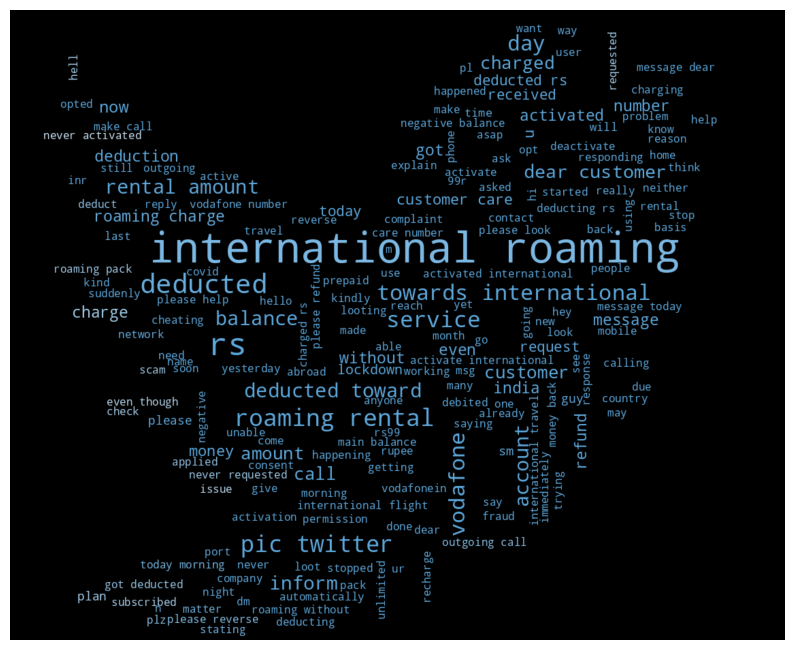

In [21]:
# Concatenate all words in Cluster 0 into a single string
cluster_0_words= ' '.join(text for text in cluster_0['Tweet'])

# Generate a word cloud for Cluster 0
wordcloud(cluster_0_words)

### Word Cloud for Cluster 1

This word cloud visualization represents the most frequent terms in the tweets belonging to **Cluster 1**. The larger the word appears, the more frequently it occurs in the dataset.

Key terms such as **"twitter," "vodafone," "service," "network," "pic," and "international roaming"** appear prominently, indicating common themes and issues within the cluster. These words suggest that customers are frequently discussing network-related problems, service quality, and issues with international roaming.

Other notable terms like **"deduction," "balance," "activated," "bill,"** and **"complain"** emphasize recurring topics related to customer complaints about billing, activation, and service issues.




In [22]:
# Filter the tweets in Cluster 1
cluster_1= frame[frame['Cluster'] == 1]

# Display the filtered tweets
cluster_1.head(10)

,Tweet,Cluster
1,please check what happens to this no 940417705...,1
1,network fluctuations and 4g speed is pathetic....,1
1,this has been going on since 3rd... this absol...,1
1,but when???still i am not received any call fr...,1
1,mere area me vodafone ka network nai aa raha ...,1
1,"\nhi,\n today my vodafone cim is deactivated ...",1
1,"dear vodafone, i have already responded to you...",1
1,sir our market area me bilkul network nahi aa...,1
1,vodafone netwrk is worst ever...using from so ...,1
1,"9796053999... internet not working, pls assis...",1


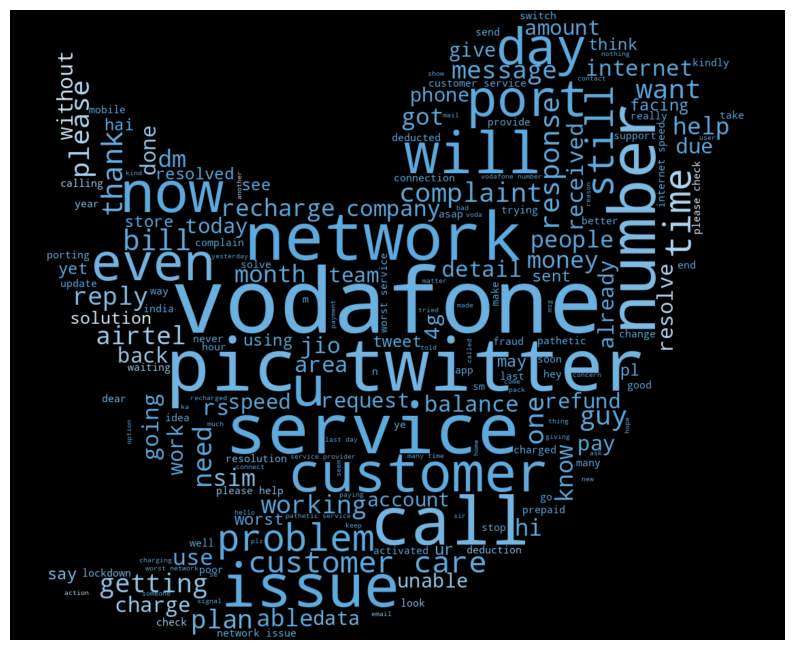

In [23]:
# Join the tweets from Cluster 1 into a single string
cluster_1_words= ' '.join(text for text in cluster_1['Tweet'])

# Generate the word cloud for Cluster 1
wordcloud(cluster_1_words)

### Word Cloud for Cluster 1

This word cloud visualization represents the most frequently occurring words in the tweets belonging to **Cluster 1**. Key terms like **"vodafone," "service," "network," "call," "number,"** and **"customer care"** appear prominently, suggesting recurring topics of customer complaints about network issues, service quality, and contact with customer care.

Additional words such as **"international roaming," "deduction," "activated,"** and **"recharge"** point to a variety of concerns regarding roaming services, balance deductions, and recharging issues.

However, unlike Cluster 1, the topics in Cluster 0 appear more scattered and less cohesive. There seems to be a wide range of different issues being discussed, making it difficult to identify a single overarching theme. This suggests that the cluster contains a broader variety of topics, and a more detailed clustering approach might be needed to separate these issues into more focused topics.


In [24]:
# Update the number of clusters
num_clusters= 6
km= KMeans(n_clusters= num_clusters)
km.fit(dt_matrix)

# Assign clusters to the DataFrame
clusters= km.labels_.tolist()
tweets= {'Tweets': df['clean_text'].tolist(), 'Cluster': clusters}
frame= pd.DataFrame(tweets)

KMeans(n_clusters=6)

In [25]:
# View the DataFrame
frame.head()

,Tweets,Cluster
0,please check what happens to this no 940417705...,0
1,network fluctuations and 4g speed is pathetic....,2
2,this has been going on since 3rd... this absol...,0
3,but when???still i am not received any call fr...,0
4,mere area me vodafone ka network nai aa raha ...,2


In [26]:
# Check distribution of clusters
frame['Cluster'].value_counts()

Cluster
0    11429
2     2719
5     1380
1      589
4      259
3        3
Name: count, dtype: int64

In [27]:
# inertia = []
# K = range(1, 11)
# for k in K:
#     km = KMeans(n_clusters=k, random_state=42)
#     km.fit(dt_matrix)
#     inertia.append(km.inertia_)

# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

In [28]:
# from sklearn.metrics import silhouette_score

# for k in range(2, 11):
#     km = KMeans(n_clusters=k, random_state=42)
#     labels = km.fit_predict(dt_matrix)
#     score = silhouette_score(dt_matrix, labels)
#     print(f"k={k}, silhouette score={score:.3f}")

Word Cloud for Cluster 0:


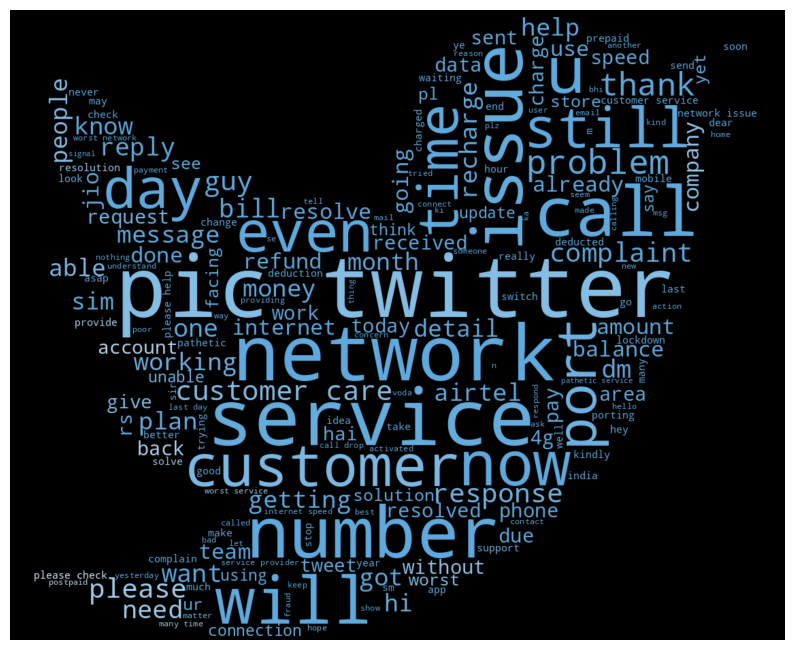

Word Cloud for Cluster 1:


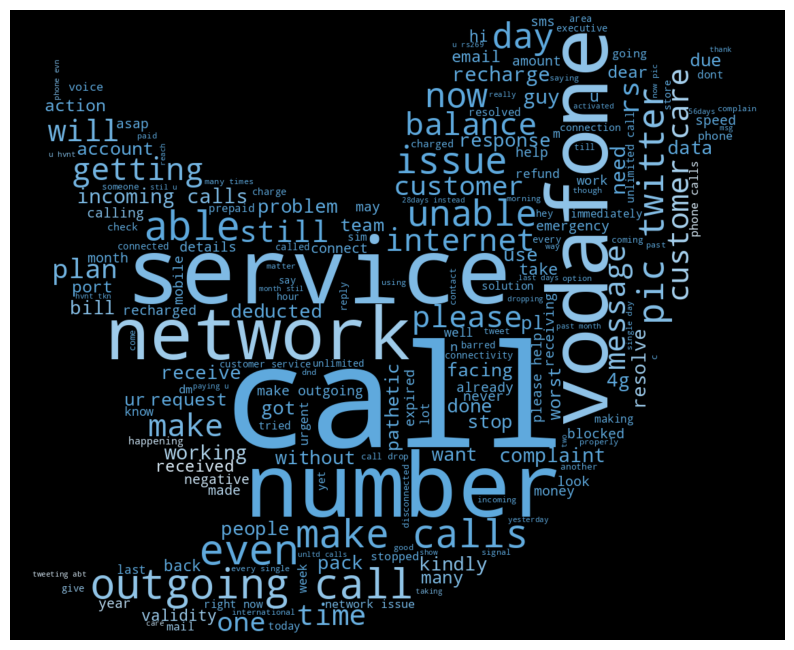

Word Cloud for Cluster 2:


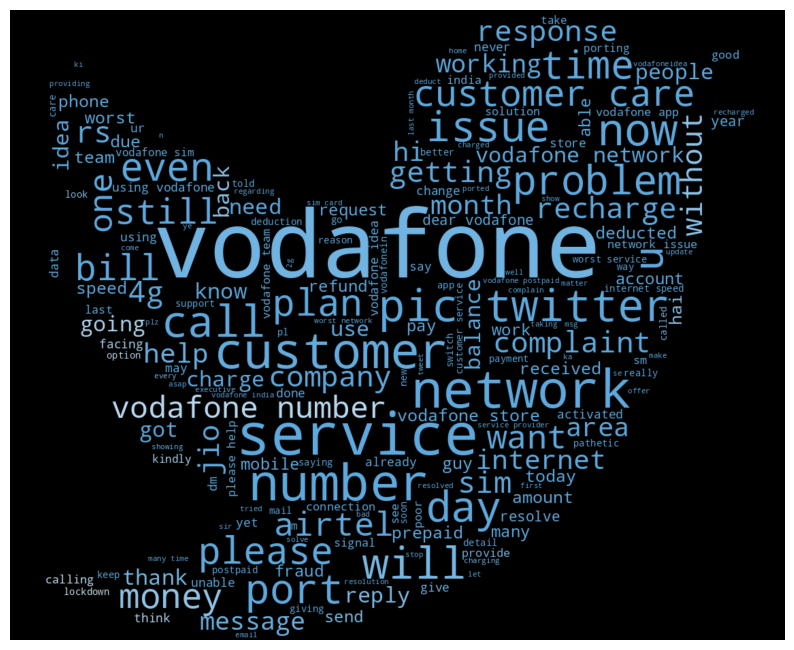

Word Cloud for Cluster 3:


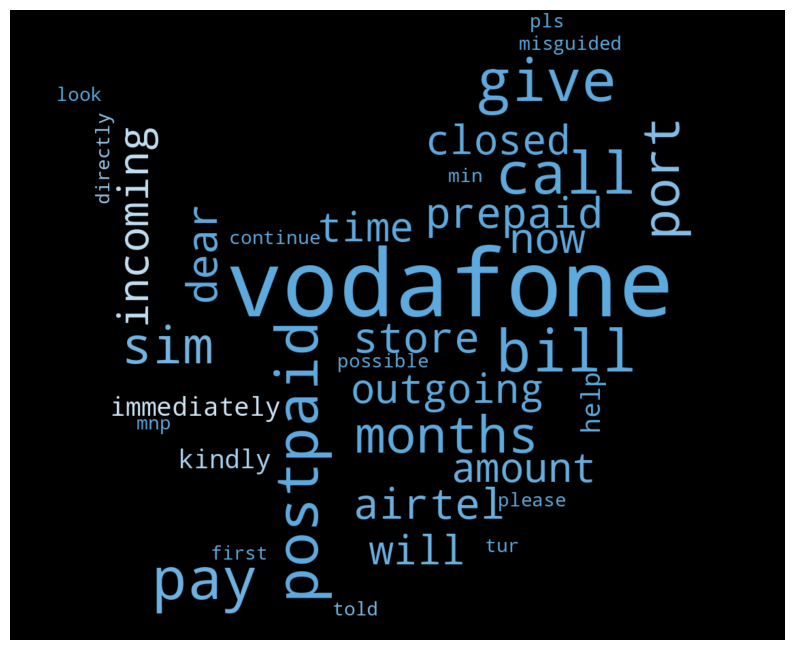

Word Cloud for Cluster 4:


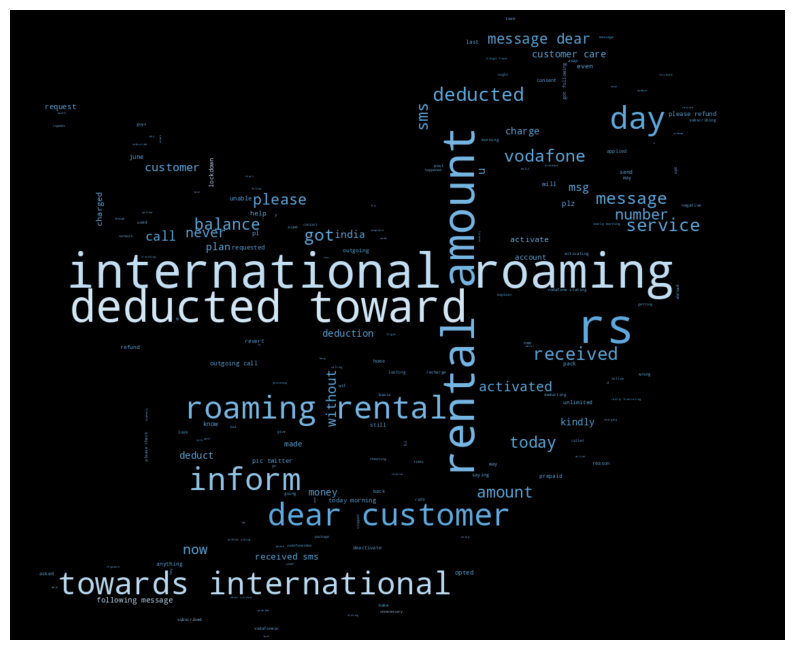

Word Cloud for Cluster 5:


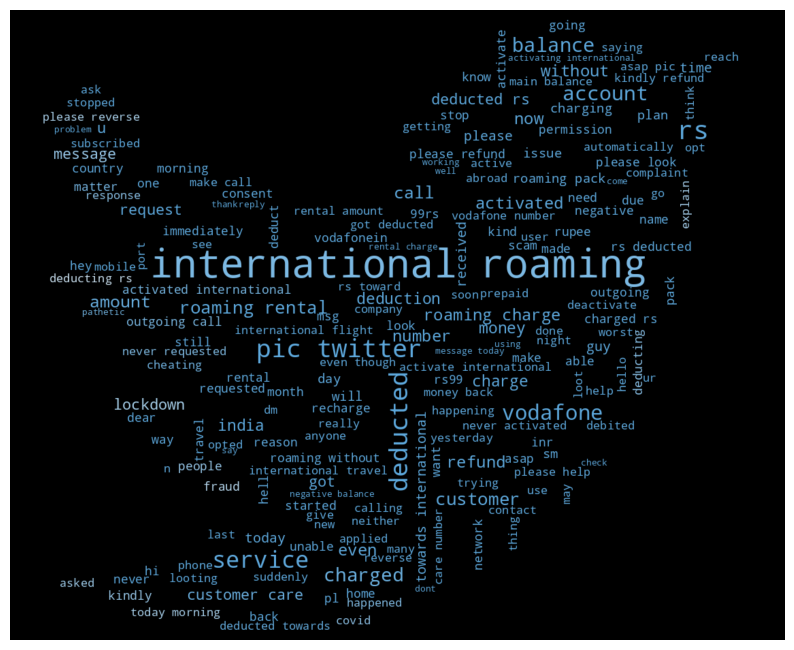

In [29]:
# Generate word clouds for each cluster
for i in range(num_clusters):
  cluster= frame[frame['Cluster'] == i]
  cluster_words= ' '.join(text for text in cluster['Tweets'])

  print(f'Word Cloud for Cluster {i}:')
  wordcloud(cluster_words)

Comparative Analysis: Multi-Cluster vs. Binary Clustering Approaches
When analyzing customer feedback using clustering techniques, the number of clusters selected can significantly influence the insights derived. A binary (2-cluster) approach offers a high-level view of sentiment or broad themes, but often lacks the specificity needed to identify actionable issues. In contrast, using a more granular multi-cluster method—such as dividing data into 6 clusters—reveals distinct patterns and allows for deeper understanding of various customer concerns.

Binary Clustering Tradeoff
A 2-cluster method typically categorizes feedback into broad positive and negative sentiments or general categories such as “satisfaction” and “dissatisfaction.” While useful for initial overviews or sentiment analysis, this approach can mask the variety and specificity of underlying concerns. As a result, critical themes may be overlooked.

Business Value of Granular Clustering
Adopting a multi-cluster strategy offers significant advantages for organizations looking to better understand and act on customer feedback. By identifying precise themes—ranging from billing and support to service quality and technical performance—businesses can:

Prioritize issues based on frequency and severity

Design targeted interventions and improvement initiatives

Allocate resources more efficiently

Enhance customer experience through focused communication and support

Ultimately, granular clustering improves decision-making by transforming unstructured feedback into clear, actionable intelligence. This can lead to higher customer satisfaction, reduced churn, and stronger brand loyalty—key drivers of long-term success in any competitive industry.

